In [52]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import pickle
import requests

style.use('ggplot')


In [21]:
start = dt.datetime(2017,1,1)
end = dt.datetime(2018,3,10)

stock = web.DataReader('TSLA','yahoo',start,end)


In [4]:
print(stock.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  214.860001  220.330002  210.960007  216.990005  216.990005   
2017-01-04  214.750000  228.000000  214.309998  226.990005  226.990005   
2017-01-05  226.419998  227.479996  221.949997  226.750000  226.750000   
2017-01-06  226.929993  230.309998  225.449997  229.009995  229.009995   
2017-01-09  228.970001  231.919998  228.000000  231.279999  231.279999   

              Volume  
Date                  
2017-01-03   5923300  
2017-01-04  11213500  
2017-01-05   5911700  
2017-01-06   5527900  
2017-01-09   3957000  


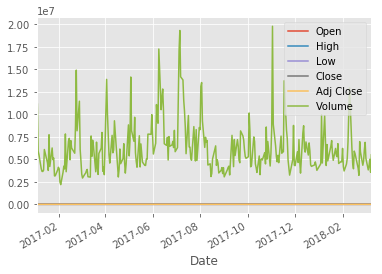

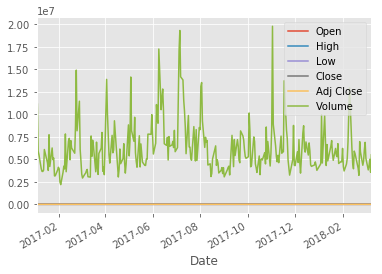

In [10]:
stock.plot()
plt.show()

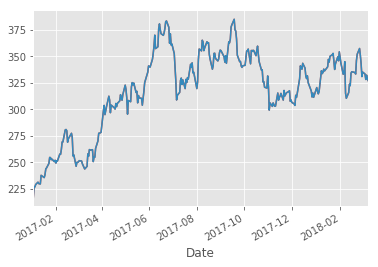

In [13]:
stock['Close'].plot()
plt.show()

In [22]:
stock['100ma'] = stock['Adj Close'].rolling(window=100).mean()
print(stock.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-05  332.390015  337.750000  329.290009  333.350006  333.350006   
2018-03-06  333.750000  336.369995  327.029999  328.200012  328.200012   
2018-03-07  325.440002  332.500000  321.739990  332.299988  332.299988   
2018-03-08  332.859985  333.299988  326.269989  329.100006  329.100006   
2018-03-09  324.100006  328.489990  322.369995  327.170013  327.170013   

             Volume       100ma  
Date                             
2018-03-05  3823800  329.434701  
2018-03-06  4285700  329.160801  
2018-03-07  5007300  328.937801  
2018-03-08  3566200  328.672001  
2018-03-09  5506800  328.388001  


In [47]:
#stock.dropna(inplace=True)#drop na will delete the rows with na, inplace=True does the change to the df
print(stock.head())
print(stock['Low'].resample('3D').ohlc().head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  214.860001  220.330002  210.960007  216.990005  216.990005   
2017-01-04  214.750000  228.000000  214.309998  226.990005  226.990005   
2017-01-05  226.419998  227.479996  221.949997  226.750000  226.750000   
2017-01-06  226.929993  230.309998  225.449997  229.009995  229.009995   
2017-01-09  228.970001  231.919998  228.000000  231.279999  231.279999   

              Volume  100ma  
Date                         
2017-01-03   5923300    NaN  
2017-01-04  11213500    NaN  
2017-01-05   5911700    NaN  
2017-01-06   5527900    NaN  
2017-01-09   3957000    NaN  
                  open        high         low       close
Date                                                      
2017-01-03  210.960007  221.949997  210.960007  221.949997
2017-01-06  225.449997  225.449997  225.449997  225.449997
2017-01-09  228.000000  228.000000 

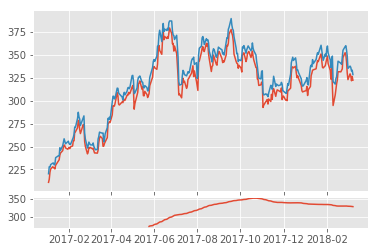

In [30]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(stock.index, stock['Low'])
ax1.plot(stock.index, stock['High'])
ax2.plot(stock.index, stock['100ma'])
plt.show()

In [42]:
stock_ohlc = stock['High'].resample('10D').ohlc()
stock_volume = stock['Volume'].resample('10D').sum()


print(stock_ohlc.head())

                  open        high         low       close
Date                                                      
2017-01-03  220.330002  232.000000  220.330002  230.699997
2017-01-13  237.850006  248.679993  237.850006  246.000000
2017-01-23  250.889999  258.459991  250.889999  253.199997
2017-02-02  252.419998  271.179993  252.179993  270.950012
2017-02-12  280.790009  287.390015  272.890015  281.399994


0    2017-01-03
1    2017-01-13
2    2017-01-23
3    2017-02-02
4    2017-02-12
5    2017-02-22
6    2017-03-04
7    2017-03-14
8    2017-03-24
9    2017-04-03
10   2017-04-13
11   2017-04-23
12   2017-05-03
13   2017-05-13
14   2017-05-23
15   2017-06-02
16   2017-06-12
17   2017-06-22
18   2017-07-02
19   2017-07-12
20   2017-07-22
21   2017-08-01
22   2017-08-11
23   2017-08-21
24   2017-08-31
25   2017-09-10
26   2017-09-20
27   2017-09-30
28   2017-10-10
29   2017-10-20
30   2017-10-30
31   2017-11-09
32   2017-11-19
33   2017-11-29
34   2017-12-09
35   2017-12-19
36   2017-12-29
37   2018-01-08
38   2018-01-18
39   2018-01-28
40   2018-02-07
41   2018-02-17
42   2018-02-27
43   2018-03-09
Name: Date, dtype: datetime64[ns]


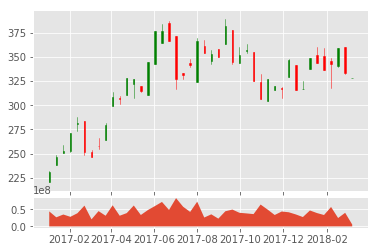

In [43]:
stock_ohlc.reset_index(inplace=True)
print(stock_ohlc['Date'])
stock_ohlc['Date'] = stock_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1,stock_ohlc.values, width=2,colorup='g')
ax2.fill_between(stock_volume.index.map(mdates.date2num),stock_volume.values,0)
plt.show()

In [50]:
print(type(stock_ohlc.values))

<class 'numpy.ndarray'>
